<h1 style="text-align:center"> Drexel University </h1>
<h2 style = "text-align:center">INFO 250: Information Visualization</h2>
<h3 style = "text-align:center">Final Project</h3>
<h3 style = "text-align:center">Ronak Patel</h3>
<div style="text-align:center; border-style:solid; padding: 10px">
</div>

<h3 style="color:red; font-weight:bold; text-decoration: underline">Project Name: Rain in Australia</h3>

In [1]:
#import desried conventions
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline
import warnings
warnings.simplefilter("ignore")
pd.set_option('display.max_columns', None)

In [2]:
#Load dataset to the pandas dataframe
ausW_df = pd.read_csv('weatherAUS.csv', parse_dates=['Date'])

### Explaining Dataset

The dataset contains about 10 years of daily weather observations from many locations across Australia. rain tomorrow is the target variable to predict. It means -- did it rain the next day, Yes or No? This column is Yes if the rain for that day was 1mm or more. To defined outcomes from the data, We will perform Exploratory data analysis and show insights with the help of visualizations.

**Reference Cite**: https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

**Dataset Preview**

In [3]:
ausW_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
ausW_df.shape

(145460, 23)

**The dataset contains 145460 rows and 23 columns**

**Vairables Dictionary**

•	**Location:** The common name of the location of the weather station

•	**MinTemp:** The minimum temperature in degrees celsius

•	**MaxTemp:** The maximum temperature in degrees celsius

•	**RainFall:** The amount of rainfall recorded for the day in mm

•	**Evaporation:** The so-called Class A pan evaporation (mm) in the 24 hours to 9am

•	**Sunshine:** The number of hours of bright sunshine in the day.

•	**WindGustDir:** The direction of the strongest wind gust in the 24 hours to midnight

•	**WindGustSpeed:** The speed (km/h) of the strongest wind gust in the 24 hours to midnight

•	**WindDir9am:** Direction of the wind at 9am

•	**WindDir3pm:** Direction of the wind at 3pm

•	**WindSpeed9am:** Wind speed (km/hr) averaged over 10 minutes prior to 9am

•	**WindSpeed3pm:** Wind speed (km/hr) averaged over 10 minutes prior to 3pm

•	**Humidity9am:** Humidity (percent) at 9am

•	**Humidity3pm:** Humidity (percent) at 3pm

•	**Pressure9am:** Atmospheric pressure (hpa) reduced to mean sea level at 9am

•	**Pressure3pm:** Atmospheric pressure (hpa) reduced to mean sea level at 3pm

•	**Cloud9am:** Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast.

•	**Cloud3pm:** Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values

•	**Temp9am:** Temperature (degrees C) at 9am

•	**Temp3pm:** Temperature (degrees C) at 3pm

•	**RainToday:** Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

•	**RainTomorrow:** The amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the "risk"

**Questions that our visualizations can help answer:**
1.	What is the amount of rainfall recorded in this location?
2.	What was the maximum average temperature recorded at particular location?
2.	What was the minimum average temperature recorded at particular location?
4.	Which location has the most rainfall?

### Visualization

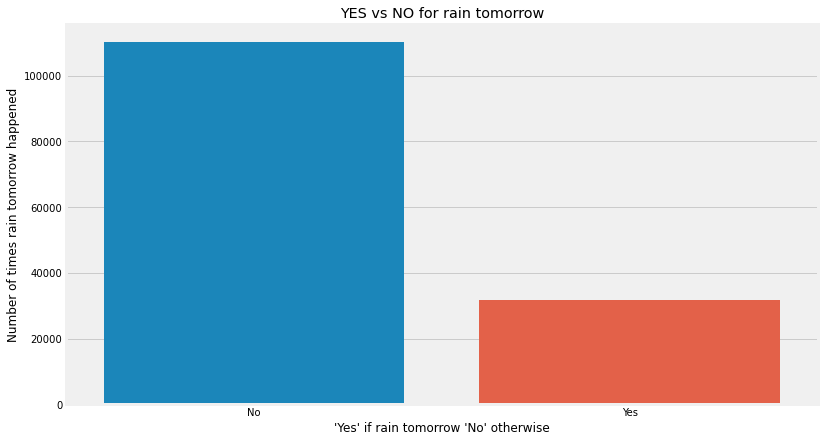

In [7]:
print("\n")
plt.figure(figsize =(12,7))
plt.title("YES vs NO for rain tomorrow")
ax = sns.countplot(data = ausW_df, x = 'RainTomorrow')
ax.set(xlabel="'Yes' if rain tomorrow 'No' otherwise", ylabel = "Number of times rain tomorrow happened")
plt.savefig('NumOfTimes.png')

This visualization helps us check the number of times rain tomorrow happened by giving us the total number of yes’s and no’s. It also shows us whether the dataset is balanced or not on the basis of the rain tomorrow variable. knowing the total number of no’s and yes can help us find the probability of yes over no for rain tomorrow.

In [20]:
ausW_df_Monthly= ausW_df.resample('M', on='Date').mean()

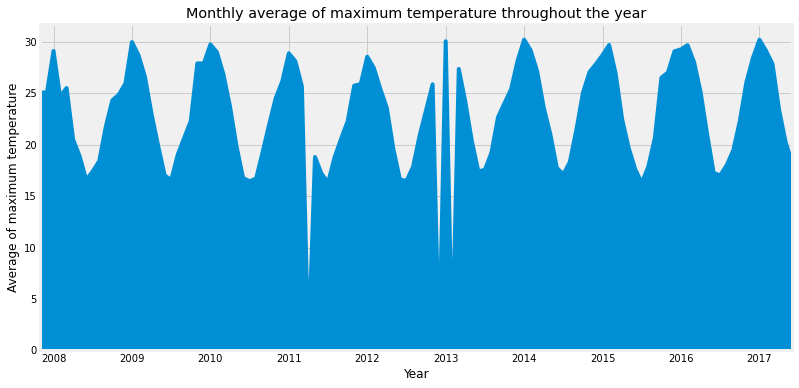

In [21]:
print("\n")
plt.figure(figsize =(12,6))
plt.title("Monthly average of maximum temperature throughout the year")
ausW_df_Monthly['MaxTemp'].plot(kind='area')
plt.xlabel('Year')
plt.ylabel('Average of maximum temperature')
plt.savefig('AvgMaxTemp.png')

The goal of the above visualization is to show how the average maximum temperature is for Australia throughout different months and in different years. The peak shows maximum temperature for that year and downfall shows a drop in maximum temperature. This visualization is best to show maximum temperature trends throughout the year.

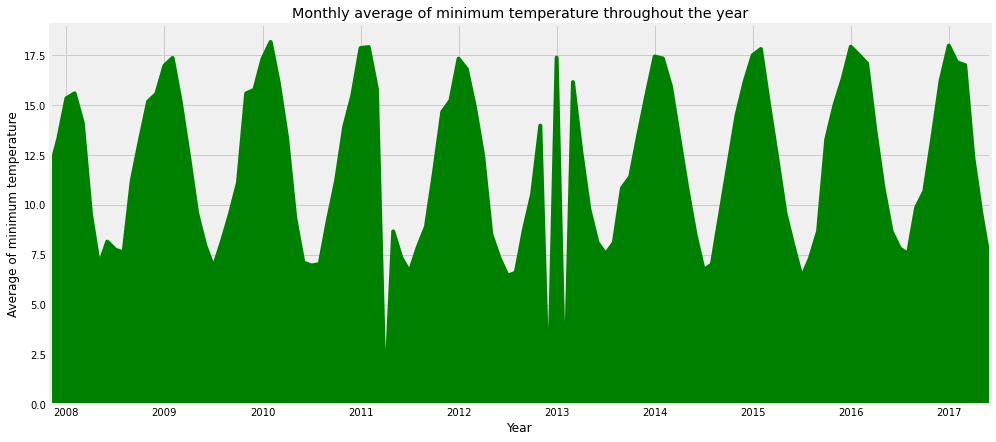

In [23]:
print("\n")
plt.figure(figsize=(15,7))
plt.title("Monthly average of minimum temperature throughout the year")
ausW_df_Monthly['MinTemp'].plot(kind='area',color='g')
plt.xlabel('Year')
plt.ylabel('Average of minimum temperature')
plt.savefig('AvgMinTemp.png')

The goal of the above visualization is to show how the average minimum temperature is for Australia throughout different months and in different years. The peak shows minimum temperature for that year and downfall shows a drop in minimum temperature. This visualization is best to show minimum temperature trends throughout the year. 

In [28]:
#Copying the data
ausW_dfCopy = ausW_df.copy()

In [29]:
ausW_dfCopy['year'] = pd.DatetimeIndex(ausW_dfCopy['Date']).year
ausW_dfCopy['month'] = pd.DatetimeIndex(ausW_dfCopy['Date']).month
ausW_dfCopy['day'] = pd.DatetimeIndex(ausW_dfCopy['Date']).day

[Text(0.5, 1.0, 'Highest to Lowest minimum temperature of different locations'),
 Text(0.5, 0, 'Location(different cities in Australia)'),
 Text(0, 0.5, 'Minimum Temperature at the location')]

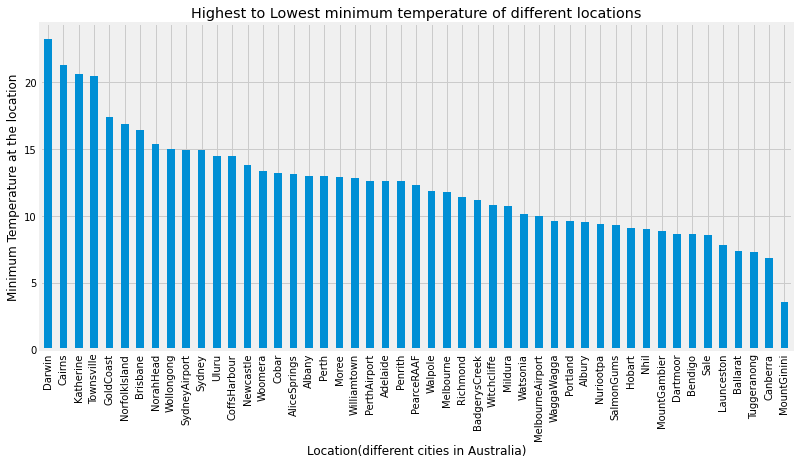

In [35]:
print("\n")
ax = ausW_dfCopy.groupby(['Location']).mean()['MinTemp'].sort_values(ascending=False).plot(kind='bar',figsize=(12,6))
ax.set(title="Highest to Lowest minimum temperature of different locations", xlabel="Location(different cities in Australia)", ylabel = "Minimum Temperature at the location")

The goal of this visualization is to show the average minimum temperature at different locations throughout Australia from highest to lowest temperature. This can help us know which city has the highest average minimum temperature and which has the lowest average minimum temperature

[Text(0.5, 1.0, 'Highest to Lowest maximum temperature of different locations'),
 Text(0.5, 0, 'Location(different cities in Australia)'),
 Text(0, 0.5, 'Maximum Temperature at the location')]

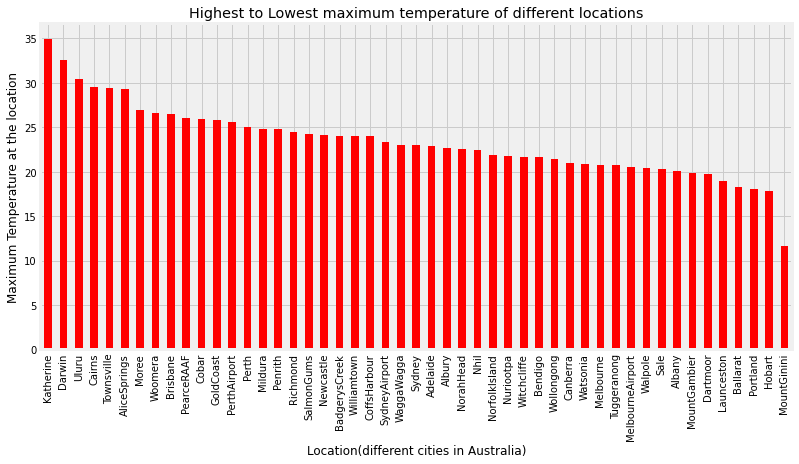

In [36]:
print("\n")
ax = ausW_dfCopy.groupby(['Location']).mean()['MaxTemp'].sort_values(ascending=False).plot(kind='bar',figsize=(12,6),color='r')
ax.set(title="Highest to Lowest maximum temperature of different locations", xlabel="Location(different cities in Australia)", ylabel = "Maximum Temperature at the location")

The goal of this visualization is to show the average maximum temperature at different locations throughout Australia from highest to lowest temperature. This can help us know which city has the highest average maximum temperature and which has the lowest average maximum temperature

[Text(0.5, 1.0, 'Total Number of rainfalls at different locations'),
 Text(0.5, 0, 'Location (different locations in Australia)'),
 Text(0, 0.5, 'Total Number of rainfalls')]

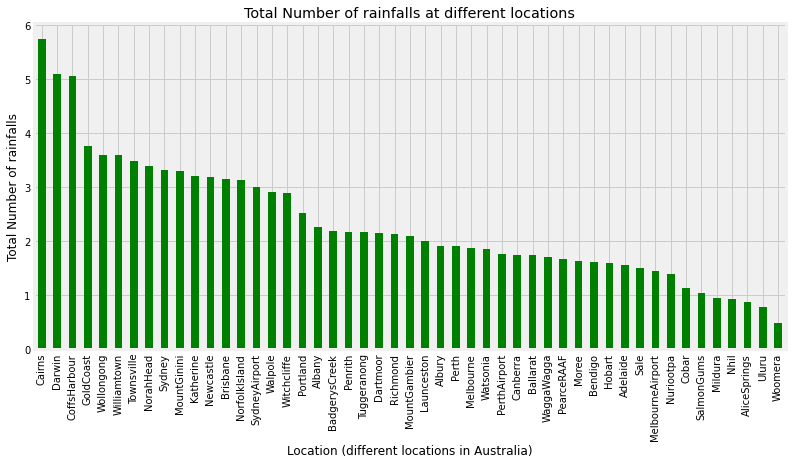

In [37]:
print("\n")
ax = ausW_dfCopy.groupby(['Location']).mean()['Rainfall'].sort_values(ascending=False).plot(kind='bar',figsize=(12,6),color='g')
ax.set(title="Total Number of rainfalls at different locations", xlabel="Location (different locations in Australia)", ylabel = "Total Number of rainfalls")

The purpose of this visualization is to show the average of rainfalls in different locations of Australia. It can be used to check the city with the most rainfalls and city with least rainfalls.

## THE END